<a href="https://colab.research.google.com/github/onubrooks/pandas-tutorial/blob/master/Onu_Abah_assignment1_USA_flights_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href='https://www.altschoolafrica.com/'> <h2> Python for Data Engineering </h2></a>


# <center> CAPSTONE PROJECT 1 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='https://github.com/onubrooks/pandas-tutorial/blob/master/altschool.jpeg?raw=1' width=50%>


In [2]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

Use this [link](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA) to download the dataset and add the path to below to load to pandas. 

Run all the cell to confirm everything is running and then attempt the questions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [5]:
%%time
# change the path if needed
path = "https://github.com/onubrooks/pandas-tutorial/releases/download/upload/2008.csv.bz2"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 20.7 s, sys: 588 ms, total: 21.3 s
Wall time: 27.1 s


**Check the number of rows and columns and print column names.**

In [6]:
print(flights_df.shape)
print(flights_df.columns)

(2389217, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [7]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0


**Transpose the frame to see all features at once.**

In [8]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,1343.0,1125.0,2009.0,903.0,1423.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,588,1343,3841,3,25
ArrDelay,16.0,2.0,-4.0,-2.0,16.0
DepDelay,18.0,5.0,-6.0,8.0,23.0
Origin,HOU,HOU,HOU,HOU,HOU


**Examine data types of all features and total dataframe size in memory.**

In [9]:
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [10]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.697202
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.933848
DepDelay              2.697202
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     97.302798
CarrierDelay         75.532444
WeatherDelay         75.532444
NASDelay             75.532444
SecurityDelay        75.532444
LateAircraftDelay    75.532444
dtype: float64

**Get basic statistics of each feature.**

In [11]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2389217.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2389217.0,2.505009,1.121493,1.0,1.0,3.0,4.0,4.0
DayofMonth,2389217.0,15.663856,8.750405,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2389217.0,3.909625,1.980431,1.0,2.0,4.0,6.0,7.0
DepTime,2324775.0,NaN,NaN,1.0,930.0,1330.0,1733.0,2400.0
FlightNum,2389217.0,2213.887980,1951.392101,1.0,605.0,1544.0,3631.0,9741.0
ArrDelay,2319121.0,NaN,NaN,-91.0,-9.0,0.0,15.0,2460.0
DepDelay,2324775.0,NaN,NaN,-92.0,-4.0,0.0,11.0,2468.0
Distance,2389217.0,726.158911,557.176261,17.0,325.0,583.0,957.0,4962.0
Cancelled,2389217.0,0.026972,0.162002,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [12]:
flights_df['UniqueCarrier'].nunique()

20

In [13]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    398966
AA    204519
OO    195184
MQ    167860
UA    154036
US    153539
DL    151409
XE    138757
NW    122799
CO    102702
EV     92383
9E     88359
FL     86856
YV     85686
OH     71934
B6     67478
AS     49885
F9     30680
HA     18385
AQ      7800
dtype: int64

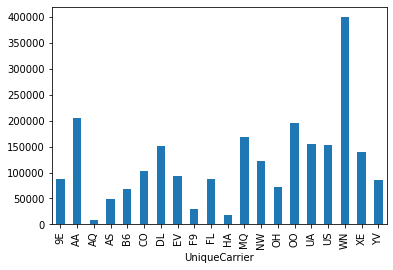

In [14]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [15]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
UA             3            729366.0
CO             15           600402.0
               14           600402.0
Name: Distance, dtype: float64

**Another way:**

In [16]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                 Cancelled
                            mean       sum count       sum
UniqueCarrier FlightNum                                   
UA            3           2827.0  729366.0   258         4
CO            15          4962.0  600402.0   121         0
              14          4962.0  600402.0   121         0

**Number of flights by days of week and months:**

In [17]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225


**It can also be handy to color such tables in order to easily notice outliers:**

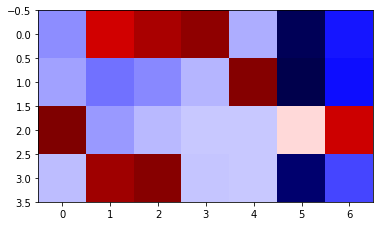

In [18]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

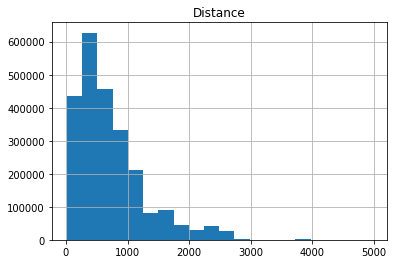

In [19]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [20]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [21]:
num_flights_by_date = flights_df.groupby('Date').size()

<Axes: xlabel='Date'>

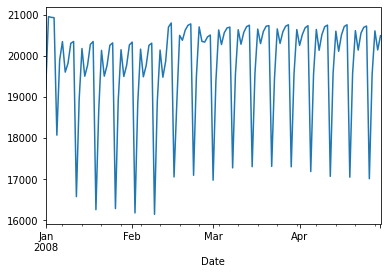

In [22]:
num_flights_by_date.plot()

**Do you see a weekly pattern above? And below?**

### Now it's your turn. Answer the questions below.

##### The next 20 questions is going to be very tasking so get ready, but don't worry it's easy

That's it! Now go and do 30 push-ups! :). You are now a guru in Data Manipulation and Analysis with Python

In [23]:
# 18. Which month has the greatest number of cancellations due to Carrier?
flights_df.head()
flights_df[flights_df['CancellationCode'] == 'A'].groupby('Month').size().sort_values(ascending=False)

Month
4    7312
1    6635
2    6090
3    6038
dtype: int64

<Axes: xlabel='Month,CancellationCode'>

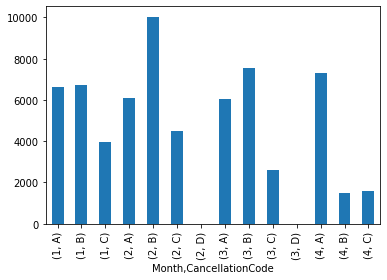

In [24]:
# 17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.
flights_df.groupby(['Month', 'CancellationCode']).size().plot(kind='bar')

In [25]:
# 2. We have both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?
flights_df.groupby('Cancelled')['FlightNum'].count()

Cancelled
0    2324775
1      64442
Name: FlightNum, dtype: int64

<Axes: xlabel='DayOfWeek'>

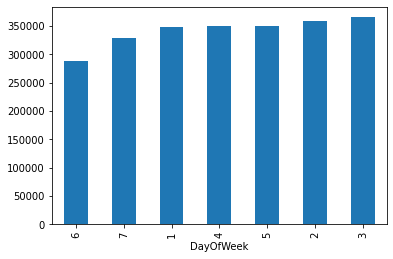

In [26]:
# 16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.
# I'm assuning saturday is 6 and sunday is 7
flights_df.groupby('DayOfWeek')['FlightNum'].count().sort_values().plot(kind='bar')

In [27]:
# 1. How many unique carriers are there in our dataset?
len(flights_df['UniqueCarrier'].unique())

20

In [28]:
# 3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?
flights_df[flights_df['DepDelay'] == flights_df['DepDelay'].max()]['Dest']

2235384    MSP
Name: Dest, dtype: object

In [29]:
flights_df[flights_df['ArrDelay'] == flights_df['ArrDelay'].max()]['Dest']

1018504    MSP
Name: Dest, dtype: object

In [30]:
# 5. Let's examine departure time (DepTime column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?

In [31]:
flights_df['DepTime'].fillna(0, inplace=True)
flights_df['DepTimeInt'] = flights_df['DepTime'].astype(int)
flights_df['DepTimeInt']

0          1343
1          1125
2          2009
3           903
4          1423
           ... 
2389212    1025
2389213    1319
2389214    1335
2389215    1933
2389216     621
Name: DepTimeInt, Length: 2389217, dtype: int64

In [32]:
flights_df['Hour'] = flights_df['DepTimeInt'].apply(lambda val: val//100)

In [33]:
flights_df.groupby(['Hour']).size().sort_values(ascending=False)[:5]

Hour
6     150593
11    149688
8     149022
16    147702
7     147575
dtype: int64

In [34]:
# 10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?
flights_df[(flights_df['UniqueCarrier'] == 'NW') & (flights_df['Cancelled'] == 0)].groupby(['Hour']).size().sort_values(ascending=False)[:15]

Hour
17    9673
13    9487
19    9061
6     8972
9     8898
8     7996
12    7818
11    7041
14    6919
7     6761
15    6647
10    6229
18    6142
21    5955
16    5725
dtype: int64

In [35]:
# 12. Plot distributions of flight cancellation reasons (CancellationCode). What is the most frequent reason for flight cancellation?
flights_df.groupby('CancellationCode').size().sort_values(ascending=False)

CancellationCode
A    26075
B    25744
C    12617
D        6
dtype: int64

In [36]:
# 6. OK, now let's examine cancelled flight distribution by Month. Which Month has the least percentage of cancelled flights?
flights_df[flights_df['Cancelled'] == 1].groupby('Month').size().sort_values()

Month
4    10355
3    16183
1    17308
2    20596
dtype: int64

In [37]:
# 4. Find the carrier that has the greatest number of cancelled flights.
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    394586
AA    193735
OO    188411
MQ    158900
US    151149
UA    149420
DL    148358
XE    134832
NW    121392
CO    101618
EV     90037
FL     85953
9E     84262
YV     80536
OH     69316
B6     66576
AS     49081
F9     30582
HA     18273
AQ      7758
dtype: int64

In [38]:
# 8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.
flights_df[flights_df['Cancelled'] == 0]['Hour'].value_counts()

6     150593
11    149688
8     149022
16    147702
7     147575
17    147496
13    146839
10    144128
9     143866
14    140860
12    140542
15    139343
18    136556
19    133961
20     98407
21     89153
5      48577
22     42051
23     17200
0       7033
1       2047
4       1099
2        595
3        233
24       209
Name: Hour, dtype: int64

In [39]:
# 11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier').size().sort_values(ascending=False)[:10]

UniqueCarrier
WN    394586
AA    193735
OO    188411
MQ    158900
US    151149
UA    149420
DL    148358
XE    134832
NW    121392
CO    101618
dtype: int64

In [40]:
# 19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.
flights_df[(flights_df['CancellationCode'] == 'A') & (flights_df['Month'] == 4)].groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
AA    3696
WN     533
UA     494
YV     454
9E     391
US     335
OO     298
MQ     283
DL     226
AS     135
NW     122
FL      81
OH      76
CO      50
B6      43
XE      30
EV      29
HA      29
F9       7
dtype: int64

In [41]:
# 9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?
flights_df[flights_df['Cancelled'] == 0].groupby('Hour')['DepDelay'].mean().sort_values()

Hour
5      -4.332031
6      -1.343750
7       0.755371
4       1.073242
8       2.744141
9       5.101562
10      6.941406
11      8.390625
12      9.843750
13     10.546875
14     12.312500
16     13.546875
15     13.773438
17     14.843750
18     16.828125
19     18.109375
20     24.468750
21     24.890625
22     39.000000
23     55.250000
24     58.093750
0      65.062500
3      91.937500
1     103.312500
2     113.625000
Name: DepDelay, dtype: float16

In [42]:
# 7. Is there any month that didn't have any cancelled flights at all? Check all that apply.
flights_df[flights_df['Cancelled'] == 1].groupby('Month').size()

Month
1    17308
2    20596
3    16183
4    10355
dtype: int64

<Axes: >

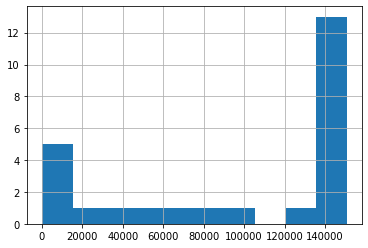

In [43]:
# 15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.
flights_df['Hour'].dropna().value_counts().hist()

In [45]:
# 13. Which route is the most frequent, in terms of the number of flights?
flights_df.groupby(['Origin', 'Dest']).size().sort_values(ascending=False)

Origin  Dest
SFO     LAX     4686
LAX     SFO     4557
OGG     HNL     4321
HNL     OGG     4198
LAX     LAS     4142
                ... 
ATW     DSM        1
ONT     GJT        1
RNO     PIH        1
BOI     GJT        1
IAH     AGS        1
Length: 4981, dtype: int64

In [46]:
# 20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). You can exclude delay time values higher than a corresponding .95 percentile).
flights_df.groupby('UniqueCarrier')['DepDelay'].median().sort_values()

UniqueCarrier
AQ   -4.0
HA   -4.0
9E   -2.0
US   -2.0
OO   -2.0
NW   -2.0
FL   -2.0
B6   -2.0
AS   -2.0
XE   -1.0
MQ   -1.0
DL   -1.0
YV   -1.0
EV    0.0
F9    0.0
OH    0.0
UA    0.0
AA    0.0
CO    1.0
WN    1.0
Name: DepDelay, dtype: float16

In [47]:
flights_df.groupby('UniqueCarrier')['ArrDelay'].median().sort_values()

UniqueCarrier
US   -5.0
AQ   -4.0
HA   -4.0
AS   -3.0
B6   -3.0
9E   -2.0
WN   -1.0
OO   -1.0
YV   -1.0
DL   -1.0
XE    0.0
EV    0.0
MQ    0.0
OH    1.0
UA    1.0
CO    1.0
FL    1.0
NW    2.0
F9    2.0
AA    3.0
Name: ArrDelay, dtype: float16

In [108]:
top_delayed = flights_df[flights_df['DepDelay'] > 0].groupby(['Origin', 'Dest']).size().sort_values(ascending=False).to_frame(name = 'count').reset_index()
top5 = top_delayed[['Origin', 'Dest']][:5]

In [109]:
top5

,Origin,Dest
0,LAX,SFO
1,DAL,HOU
2,HOU,DAL
3,ORD,LGA
4,SFO,LAX


In [110]:
as_tuples = [tuple(x) for x in top5.values]
as_tuples

[('LAX', 'SFO'),
 ('DAL', 'HOU'),
 ('HOU', 'DAL'),
 ('ORD', 'LGA'),
 ('SFO', 'LAX')]

In [111]:
subset_top5 = flights_df[pd.Series(list(zip(flights_df['Origin'], flights_df['Dest']))).isin(as_tuples)]
len(subset_top5[subset_top5['WeatherDelay'] > 0])

315